# 상관 분석
---

- 목적 : 두 연속형 변수 사이에 선형관계가 존재하는지 파악하기 위함
    - e.g) X가 증가하면 Y가 감소한다. or Y도 증가한다.    

# 영 가설 과 대립 가설
---

- 영 가설 : $H_0 :$ 두 변수간에는 유의미한 상관성이 존재한다.
- 대립 가설 : $H_1 :$ 두 변수간에는 유의미한 상관성이 존재하지 않는다.

- scatter plot(산점도)를 시각화 하여 두 변수간의 상관관계를 확인한다.
    - 즉, 통계량을 바탕으로 두 변수간의 관계를 파악

# 피어슨 상관계수
---
- 두 변수 모두 '연속형 변수' 일때만 사용하는 상관계수

![image](https://user-images.githubusercontent.com/74717033/134618322-a57270b5-9f38-4ab0-8ce0-d2b6c41050a7.png)

- $cov(x,y) $ : $x$ 와 $y$의 공분산
- 공분산 : $x$ 와 $y$ 가 함께 움직이는 정도
- 아래의 공식으로 구할 수 있다.
![image](https://user-images.githubusercontent.com/74717033/134618769-962ead9e-fe05-45b1-84d1-e5e7bfe0522b.png)

- $var(x) :$ $x$의 분산
---

- 상관계수가 1에 가까울 수록 양의 상관관계가 강하다.
- 상관계수가 0에 가까울 수록 음의 상관관계가 강하다.

## 피어슨 상관계수의 값에 따른 그림 예시
---
![image](https://user-images.githubusercontent.com/74717033/134618963-6aadd3b7-e5a8-45dd-ba2c-04414dfc0614.png)

- (1,1) 위치의 그림의 경우 $x$값이 증가함에 따른 $y$값의 증가량이 일정하다.
    - $x$ 와 $y$의 상관관계는 1이다.
    - 이 경우 머신러닝에서는 x값을 알면 y값을 정확하게 예측할 수 있다. 는 의미
    - 하지만 기획된 실험이 아니라면 이런 결과가 나오기는 거의 불가능하다.
---
- (1,2) 위치의 그림
    - $x$증가량에 따른 $y$의 증가량이 일정하진 않지만 관계성이 보인다.
    - 이 경우 머신러닝에서는 $y$값을 어느정도 예측할 수 있다.
---

# 스피어만 상관계수
---

- 두 변수 사이의 순위사이에 단조 관련성을 상관계수로 측정하는 것
    - 단조 : 방향을 역전시키지 않는
- - 스피어만 상관계수는 샘플의 값을 그대로 사용 하는 것이 아니라, 오름 차순으로 샘플 값의 크기를 정렬하여 그 순위 끼리의 상관관계를 본다.


- 스피어만 상관계수 수식
![image](https://user-images.githubusercontent.com/74717033/134623172-220933b0-7b02-4493-8648-b00eaf8a7a72.png)

- $r(x)$ : $x$ 요소의 개별 순위

e.g)
![image](https://user-images.githubusercontent.com/74717033/134623274-f2eb7f90-6b0c-4149-89be-ea3961c62868.png)

- 파란색 점들을 보면 $x$가 증가할때 $y$가 증가하는 관계에 있음을 알 수 있다.(=단조 관련성)
- 하지만 그 값들이 선형관계를 이룬다고 보기는 다소 어렵다.(위 그림의 경우 곡선)
- 이런 경우의 선형 관계를 측정하기 위한 것이 스피어만 상관계수 이다.
- 위 데이터의 피어슨 상관계수를 구하면 0.795이지만, 스피어만 상관계수는 1.0으로 훨씬 강한 선형 관계를 나타낸다.

---

- 피어슨 상관계수는 '직선' 의 선형 관계에 대한 상관계수를 측정하는 것
- 스피어만 상관계수는 '직선' 이 아닌 (= 곡선) 선형 관계에 대한 상관계수를 측정하는 것.


# 상관 분석 코드 구현
---

In [1]:
# 기초 전처리
import pandas as pd
import numpy as np


# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')


# 파일 로드위한 directory 확인 및 현재 경로로 설정
import os
a = os.getcwd()
os.chdir(a)

In [2]:
df = pd.read_excel("일별_금은달러.xlsx")

In [3]:
df.head()

,일자,금값,은값,달러 환율
0,2020.08.07,78538.90,27.53,1188.5
1,2020.08.06,78009.22,28.39,1185.5
2,2020.08.05,77748.00,26.88,1188.0
3,2020.08.04,75873.57,26.01,1194.5
4,2020.08.03,75761.76,24.39,1195.7


In [4]:
# 일자 기준으로 오름차순 정렬
df.sort_values(by = '일자', inplace = True)

In [5]:
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np

# magic 키워드로 한 셀에 여러개 그래프 자동 출력
%matplotlib inline 
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 8)

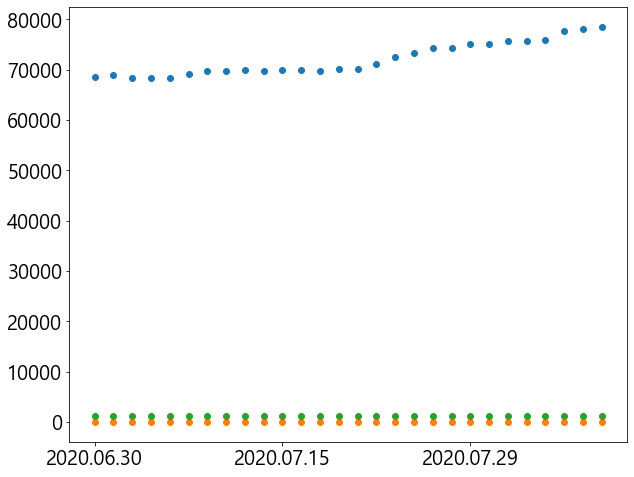

In [6]:
# 일자별 금값, 은값, 달러 환율 추이 시각화
plt.scatter(df['일자'], df['금값']);
plt.scatter(df['일자'], df['은값']);
plt.scatter(df['일자'], df['달러 환율']);

# Series()로 시각화한 경우 index가 위치, value가 label
plt.xticks(df['일자'].iloc[::10]); # 10일 단위로 표시

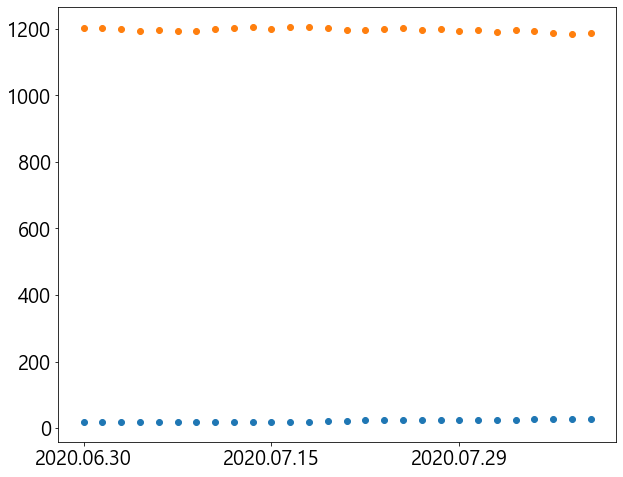

In [7]:
# 일자별 은값, 달러 환율 추이만 다시 시각화
plt.scatter(df['일자'], df['은값']);
plt.scatter(df['일자'], df['달러 환율']);

# Series()로 시각화한 경우 index가 위치, value가 label
plt.xticks(df['일자'].iloc[::10]); # 10일 단위로 표시

## 금값과 은값의 상관관계 시각화

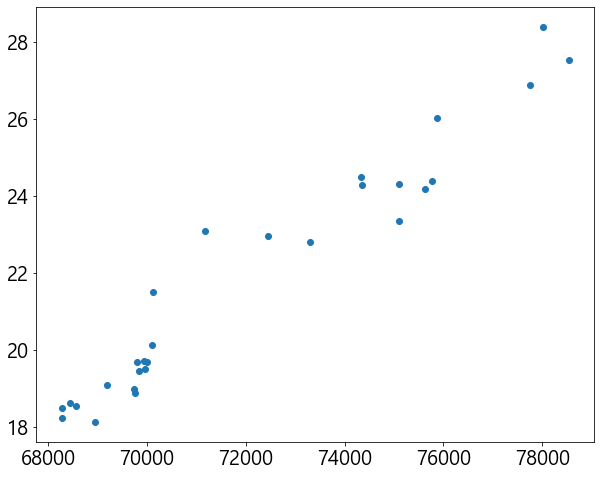

In [8]:
# 금값과 은값의 상관관계 scatter plot으로 시각화
plt.scatter(df['금값'], df['은값'])

- 금값이 증가함에 따라 은값도 증가하는 모양새를 보인다.
- 상관계수를 확인해 봐야겠지만, 그래프 상으로는 두 변수 사이에 선형 관계가 있어 보인다.

array([[<AxesSubplot:xlabel='금값', ylabel='금값'>,
        <AxesSubplot:xlabel='은값', ylabel='금값'>,
        <AxesSubplot:xlabel='달러 환율', ylabel='금값'>],
       [<AxesSubplot:xlabel='금값', ylabel='은값'>,
        <AxesSubplot:xlabel='은값', ylabel='은값'>,
        <AxesSubplot:xlabel='달러 환율', ylabel='은값'>],
       [<AxesSubplot:xlabel='금값', ylabel='달러 환율'>,
        <AxesSubplot:xlabel='은값', ylabel='달러 환율'>,
        <AxesSubplot:xlabel='달러 환율', ylabel='달러 환율'>]], dtype=object)

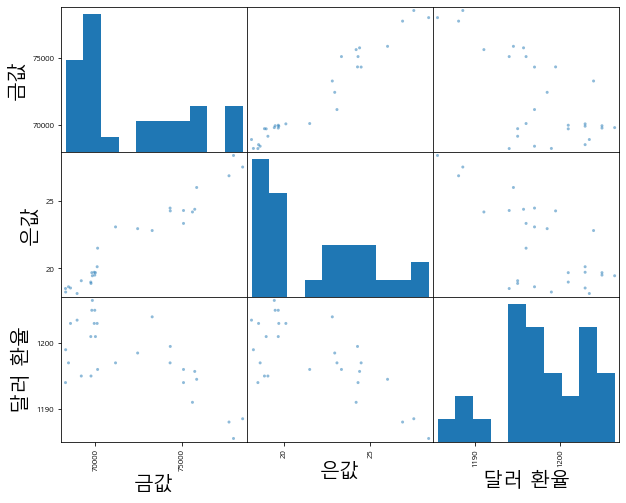

In [9]:
# pandas scatter_matrix로 df상에 각 변수별 scatter plot을 그리는 함수
pd.plotting.scatter_matrix(df.drop('일자', axis = 1))

# 피어슨 상관계수 
- scipy.stats.pearsonr(x, y)
- 결과는 (statistics, pvalue) 형태로 출력
- statistics : 피어슨 상관계수
- pvalue : 0.05 미만이면 두 변수간 유의한 상관관계가 있다고 판단한다.

In [10]:
from scipy.stats import *
print(pearsonr(df['금값'], df['은값']))
print(pearsonr(df['금값'], df['달러 환율']))
print(pearsonr(df['은값'], df['달러 환율']))

(0.9718640116033496, 7.508878356557318e-18)
(-0.6793266264341937, 7.033325258452259e-05)
(-0.6954569556203559, 3.989042061957972e-05)


- 금값 <-> 은값은 statistics가 0.97로 (1에 매우 가깝다) 강한 양의 선형 관계를 보인다.
    - 또한, pvalue가 0에 근사하므로 두 변수간의 상관관계는 유의하다.
    - 즉, 금값이 증가하면 은값도 증가한다. (vice versa)
---

- 금값 <-> 달러환율 & 은값 <-> 달러 환율은 statistics가 약 -0.7로 음의 상관관계를 보인다.
    - pvalue도 0에 근사하므로 두 변수간의 상관관계는 유의하다.
    - 이 경우 금값과 은값이 증가하면 달러 환율이 하락한다. 고 해석할 수 있다.

## 변수별 상관관계 확인(feat.변수가 많을때)

In [11]:
# 아래와 같이 for문을 활용해 모든 변수간 조합을 만들어서 corr()을 측정할 수 있다.
import itertools
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2): # target_column에서 2개씩 뽑기
    result = pearsonr(df[col1], df[col2]) # pearson 상관계수 구하기
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))
    # result[0] : statistics
    # result[1] : pvalue

금값 ~ 은값: coef:0.9718640116033496, p-value: 7.508878356557318e-18
금값 ~ 달러 환율: coef:-0.6793266264341937, p-value: 7.033325258452259e-05
은값 ~ 달러 환율: coef:-0.6954569556203559, p-value: 3.989042061957972e-05


# 스피어만 상관계수
---

- scipy.stats.spearmanr(x, y)
- 결과는 (statistics, pvalue) 형태로 출력
- statistics : 스피어만 상관계수
- pvalue : 0.05미만일 경우 유의한 상관성이 있다고 판단 한다.

In [12]:
import itertools
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = spearmanr(df[col1], df[col2]) # spearman 상관계수 구하기
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:0.9711235892228813, p-value: 1.0481280432981455e-17
금값 ~ 달러 환율: coef:-0.5039075855936102, p-value: 0.006257468267109453
은값 ~ 달러 환율: coef:-0.528106006718531, p-value: 0.003869997604824081


- 선형관계는 pearson 과 다르지 않지만, 수치에 다소 차이가 있다.
- 이 경우 해당 데이터는 일반적인 선형관계에 비해 '순위'에 대해서는 상관관계가 크게 존재하지 않음을 알 수 있다.

# 상관 행렬
---
- 데이터 프레임내에서 각 컬럼사이의 상관계수를 행렬로 표현할때 사용
- DataFrame.corr(method)
    - method : pearson, spearman 둘중 하나 필요한 측정 방식을 입력

In [13]:
df.drop('일자', axis = 1).corr(method = 'pearson')

,금값,은값,달러 환율
금값,1.000000,0.971864,-0.679327
은값,0.971864,1.000000,-0.695457
달러 환율,-0.679327,-0.695457,1.000000


In [14]:
df.drop('일자', axis = 1).corr(method = 'spearman')

,금값,은값,달러 환율
금값,1.000000,0.971124,-0.503908
은값,0.971124,1.000000,-0.528106
달러 환율,-0.503908,-0.528106,1.000000
